In [1]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv('horse_data.csv',header=None)

In [10]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2,1,530101,38.50,66,28,3,3,?,2,...,45.00,8.40,?,?,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,?,?,4,1,...,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,...,33.00,6.70,?,?,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,...,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,?,?,6,2,...,74.00,7.40,?,?,2,2,4300,0,0,2


In [99]:
#Задание 1.
#Изучить представленный набор данных на основе описания его столбцов и выбрать 8 столбцов для дальнейшего изучения 
#(среди них должны быть как числовые, так и категориальные). 
#Провести расчет базовых метрик для них, кратко описать результаты.


df.columns

Index([         'surgery',              'age',       'hospital_N',
          'R_temperature',            'pulse', 'respiratory_rate',
          't_extremities', 'peripheral_pulse',                  8,
                        9,                 10,                 11,
                       12,                 13,                 14,
                       15,                 16,                 17,
                       18,                 19,                 20,
                       21,                 22,                 23,
                       24,                 25,                 26,
                       27],
      dtype='object')

In [32]:
df.rename(columns = {0:'surgery', 1: 'age', 2:'hospital_N', 3:'R_temperature', 4:'pulse', 5: 'respiratory_rate' , 
                     6: 't_extremities', 7: 'peripheral_pulse'}, inplace=True)

In [33]:
df.columns

Index([         'surgery',              'age',       'hospital_N',
          'R_temperature',            'pulse', 'respiratory_rate',
          't_extremities', 'peripheral_pulse',                  8,
                        9,                 10,                 11,
                       12,                 13,                 14,
                       15,                 16,                 17,
                       18,                 19,                 20,
                       21,                 22,                 23,
                       24,                 25,                 26,
                       27],
      dtype='object')

In [47]:
df1 = df[['surgery', 'age', 'hospital_N', 'R_temperature', 'pulse', 'respiratory_rate' ,'t_extremities',
          'peripheral_pulse']].copy()
df1.head()

,surgery,age,hospital_N,R_temperature,pulse,respiratory_rate,t_extremities,peripheral_pulse
0,2,1,530101,38.50,66,28,3,3
1,1,1,534817,39.2,88,20,?,?
2,2,1,530334,38.30,40,24,1,1
3,1,9,5290409,39.10,164,84,4,1
4,2,1,530255,37.30,104,35,?,?


In [48]:
df1.describe(include='all')

'''
300 наблюдений (300 строк) в датасете
пропуски записаны в виде вопросов, 
возраст лошадей - всего два значения (1 - 276, 9 - 24)
hospital_N = 284 уникальных
R_temperature - 66 уникальных наблюдений, самое часто встречаемое - "?" встречается 60 раз
pulse - 53 уникальных наблюдений, чаще всего встречается '48' - 28 раз
respiratory_rate - 41 уникальное значение, самое часто встречаемое - "?" встречается 58 раз
t_extremities - 5 уникальных значений, самое часто встречаемое - 3 встречается 109 раз
peripheral_pulse - 5 уникальных значений, самое часто встречаемое - 1 встречается 115 раз
'''

,surgery,age,hospital_N,R_temperature,pulse,respiratory_rate,t_extremities,peripheral_pulse
count,300,300.000000,3.000000e+02,300,300,300,300,300
unique,3,NaN,NaN,66,53,41,5,5
top,1,NaN,NaN,?,48,?,3,1
freq,180,NaN,NaN,60,28,58,109,115
mean,NaN,1.640000,1.085889e+06,NaN,NaN,NaN,NaN,NaN
std,NaN,2.173972,1.529801e+06,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,5.184760e+05,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.000000,5.289040e+05,NaN,NaN,NaN,NaN,NaN
50%,NaN,1.000000,5.303055e+05,NaN,NaN,NaN,NaN,NaN
75%,NaN,1.000000,5.347275e+05,NaN,NaN,NaN,NaN,NaN


In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   surgery           300 non-null    object
 1   age               300 non-null    int64 
 2   hospital_N        300 non-null    int64 
 3   R_temperature     300 non-null    object
 4   pulse             300 non-null    object
 5   respiratory_rate  300 non-null    object
 6   t_extremities     300 non-null    object
 7   peripheral_pulse  300 non-null    object
dtypes: int64(2), object(6)
memory usage: 18.9+ KB


In [100]:
#Задание 2. Работа с выбросами
#В выбранных числовых столбцах найти выбросы, выдвинуть гипотезы об их причинах и проинтерпретировать результаты. 
#Принять и обосновать решение о дальнейшей работе с ними.

df1.R_temperature.value_counts()

?        60
38.00    16
37.80    13
38.30    12
38.40    10
         ..
40.00     1
39.5      1
36.5      1
40.80     1
39.3      1
Name: R_temperature, Length: 66, dtype: int64

<AxesSubplot:>

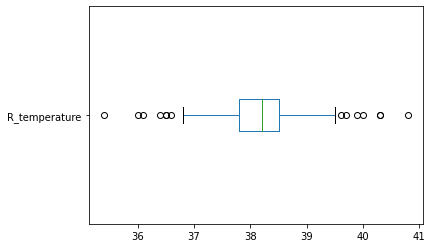

In [61]:
s=df1[df1.R_temperature!='?'].R_temperature.astype('float')
s
s.plot.box(vert=False)

'''очень низкая и очень высокая температуры могут быть связаны со спецификами заболеваний
оставляем данные как есть, абсолютные отклонения не такие большие '''

In [65]:
#Задание 3. Работа с пропусками
#Рассчитать количество пропусков для всех выбранных столбцов. 
#Принять и обосновать решение о методе заполнения пропусков по каждому столбцу на основе рассчитанных статистик и возможной взаимосвязи значений в них. 
#Сформировать датафрейм, в котором пропуски будут отсутствовать.'''


df1[df1=='?'].count()

surgery              1
age                  0
hospital_N           0
R_temperature       60
pulse               24
respiratory_rate    58
t_extremities       56
peripheral_pulse    69
dtype: int64

In [ ]:
'''
suregery - 1 вопрос, можно удалить строку
R_temperature - имеет 60 пропусков, похожее на нормальное распределение, можно заполнять медианами или средними значениями 
pulse, respiratory_rate , имеют скошенное вправо распределение, рекомендация - заполнить пропуски медианным значением
t_extremities - категориальный признак, 56 пропусков, рекомендация - заполнить чаще всего встречаемым признаком - модой
(в идеальных условиях для заполнения пропусков необходимо рассматривать значения других данных)
peripheral_pulse - категориальный признак, 69 пропусков, рекомендация такая же, как и в случае с t_extremities. 
'''

<AxesSubplot:>

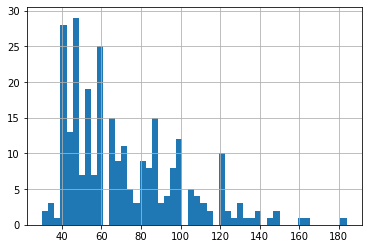

In [69]:
k=df1[df1.pulse!='?'].pulse.astype('float')
k.hist(bins=50)

In [70]:
k.mean()

71.91304347826087

In [71]:
k.median()

64.0

<AxesSubplot:>

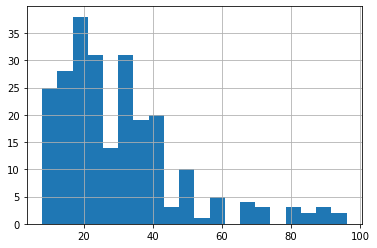

In [76]:
f=df1[df1.respiratory_rate!='?'].respiratory_rate.astype('float')
f.hist(bins=20)

In [77]:
f.mean()

30.417355371900825

In [78]:
f.median()

24.5

<AxesSubplot:>

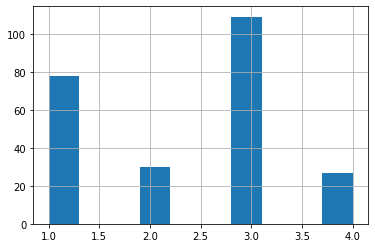

In [80]:
b=df1[df1.t_extremities!='?'].t_extremities.astype('float')
b.hist()

<AxesSubplot:>

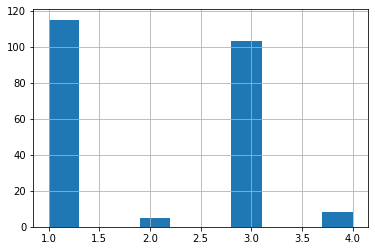

In [81]:
a=df1[df1.peripheral_pulse!='?'].peripheral_pulse.astype('float')
a.hist()

In [96]:
df2=df1.copy()
df2=df2[df2.surgery!='?'].reset_index(drop=True)
p=df1[df1.R_temperature!='?'].R_temperature.astype('float').mean()
df2.R_temperature=df2.R_temperature.where(df2.R_temperature!='?',str(p))
p=df1[df1.pulse!='?'].pulse.astype('float').median()
df2.pulse=df2.pulse.where(df2.pulse!='?',str(p))
df2.tail(10)
p=df1[df1.respiratory_rate!='?'].respiratory_rate.astype('float').median()
df2.respiratory_rate=df2.respiratory_rate.where(df2.respiratory_rate!='?',str(p))
df2.tail(10)
p=df1[df1.t_extremities!='?'].t_extremities.astype('float').mode()[0]
df2.t_extremities=df2.t_extremities.where(df2.t_extremities!='?',str(p))
df2.tail(10)
p=df1[df1.peripheral_pulse!='?'].peripheral_pulse.astype('float').mode()[0]
df2.peripheral_pulse=df2.peripheral_pulse.where(df2.peripheral_pulse!='?',str(p))
df2.tail(10)



,surgery,age,hospital_N,R_temperature,pulse,respiratory_rate,t_extremities,peripheral_pulse
289,2,1,535054,38.6,45,16,2,1
290,1,1,528890,38.90,80,44,3,3
291,1,1,530034,37.00,66,20,1,3
292,1,1,534004,38.16791666666669,78,24,3,3
293,2,1,533902,38.5,40,16,1,1
294,1,1,533886,38.16791666666669,120,70,4,1.0
295,2,1,527702,37.20,72,24,3,2
296,1,1,529386,37.50,72,30,4,3
297,1,1,530612,36.50,100,24,3,3
298,1,1,534618,37.2,40,20,3.0,1.0
